#  **Exploratory Data Analysis (EDA) - Heart Disease Prediction Dataset**

This notebook presents an Exploratory Data Analysis (EDA) of the Heart Disease Prediction Dataset to understand its structure, identify missing values, detect outliers, and analyze correlations among features.


**1. Importing Necessary Dependencies**

In [1]:
# import the neccesary dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

- pandas: Used for data manipulation and analysis.
- seaborn & matplotlib: Used for data visualization.

**2. Loading the Dataset**

In [5]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd

# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 

# Combine features and target into one DataFrame
data = pd.concat([heart_disease.data.features, heart_disease.data.targets], axis=1)

# Check the first few rows
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  


**3. Displaying Basic Information**


In [6]:
# shape of dataset (rows, columns)
print(data.shape)

# sumary of dataset
print(data.info())

(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
None


- Purpose: Understand the dataset’s structure, feature types, and missing values.
- Key Observations: Identify categorical vs. numerical features, missing values, and potential data inconsistencies.

In [7]:
len(data)

303

**4. Removing Faulty Data**


In [8]:
# Drop faulty data
data = data[data['ca'] < 4]
data = data[data['thal'] > 0]
print(len(data))

297


- Some values in the ca (number of major vessels) column exceed the expected range (0–3).
- This step ensures data consistency and avoids invalid records affecting the model.

**5. Renaming Columns for Better Readability**

In [9]:
# rename the column
data = data.rename(
  columns= {
              'cp':'chest_pain_type', 
               'trestbps':'resting_blood_pressure', 
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram', 
               'thalach': 'max_heart_rate_achieved', 
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression', 
               'slope': 'st_slope', 
               'ca':'num_major_vessels', 
               'thal': 'thalassemia'}, 
  errors="raise"
)

- Provides clear and meaningful column names to improve readability and usability.

**6. Checking for Missing Values**

In [10]:
print(data.isnull().sum())  # Count missing values in each column

age                          0
sex                          0
chest_pain_type              0
resting_blood_pressure       0
cholesterol                  0
fasting_blood_sugar          0
resting_electrocardiogram    0
max_heart_rate_achieved      0
exercise_induced_angina      0
st_depression                0
st_slope                     0
num_major_vessels            0
thalassemia                  0
num                          0
dtype: int64


Fortunately, the dataset contains no missing values, allowing us to proceed with our analysis without any imputation.

**7. Summary Statistics of Numerical Features**

In [11]:
# Basic statistics
print(data.describe())

              age         sex  chest_pain_type  resting_blood_pressure  \
count  297.000000  297.000000       297.000000              297.000000   
mean    54.542088    0.676768         3.158249              131.693603   
std      9.049736    0.468500         0.964859               17.762806   
min     29.000000    0.000000         1.000000               94.000000   
25%     48.000000    0.000000         3.000000              120.000000   
50%     56.000000    1.000000         3.000000              130.000000   
75%     61.000000    1.000000         4.000000              140.000000   
max     77.000000    1.000000         4.000000              200.000000   

       cholesterol  fasting_blood_sugar  resting_electrocardiogram  \
count   297.000000           297.000000                 297.000000   
mean    247.350168             0.144781                   0.996633   
std      51.997583             0.352474                   0.994914   
min     126.000000             0.000000              

- Provides key statistics (mean, standard deviation, min/max values, etc.) for numerical features.
- Helps detect potential outliers and understand data distribution.

**9. Identifying Duplicate Records**


In [12]:
# Check duplicates
print(data.duplicated().sum())

0


**10. Outlier Detection using Boxplots**

**Overall Boxplot of Numerical Features**

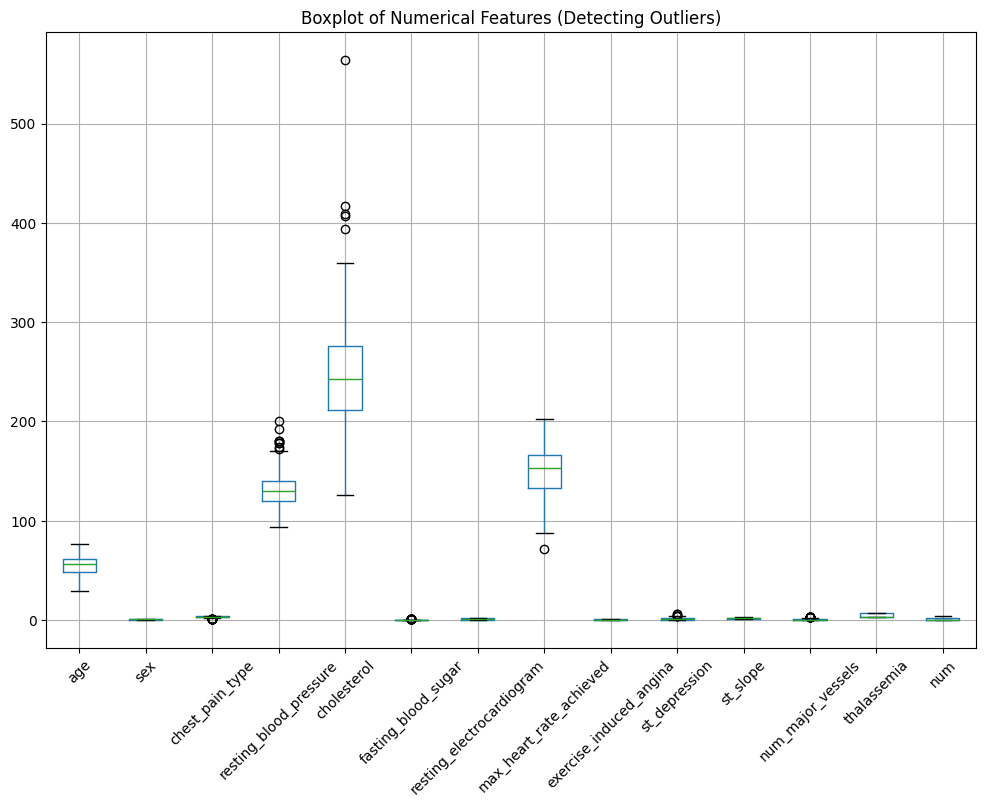

In [13]:
# List of numerical columns
numeric_columns = data.select_dtypes(include=['number']).columns

# Create boxplots for each numerical feature
plt.figure(figsize=(12, 8))
data[numeric_columns].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features (Detecting Outliers)")
plt.show()


- Purpose: Detect extreme values that might skew analysis or affect model performance.
- Interpretation: Outliers appear as points outside the whiskers.

**📌 10.1. Understanding Cholesterol Levels in the Dataset**

The cholesterol column contains values ranging from normal to extremely high.

Medically, cholesterol levels above 240 mg/dL are considered high, and above 400 mg/dL is rare.

The dataset contains five instances with cholesterol above 400 mg/dL:

417, 407, 564, 394, 409

564 mg/dL is extremely high and likely an outlier.

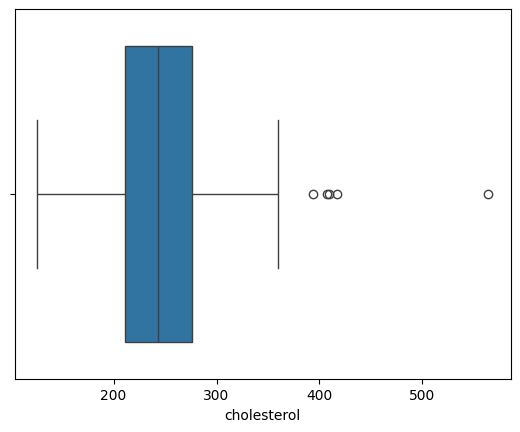

In [17]:
sns.boxplot(x=data['cholesterol'])
plt.show()

**📌 10.2. Detecting Outliers**

I used Interquartile Range (IQR) to check for extreme values:


In [18]:
Q1 = data["cholesterol"].quantile(0.25)
Q3 = data["cholesterol"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data["cholesterol"] < lower_bound) | (data["cholesterol"] > upper_bound)]
print(outliers)

     age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
48    65    0                3                     140          417   
121   63    0                4                     150          407   
152   67    0                3                     115          564   
173   62    0                4                     140          394   
181   56    0                4                     134          409   

     fasting_blood_sugar  resting_electrocardiogram  max_heart_rate_achieved  \
48                     1                          2                      157   
121                    0                          2                      154   
152                    0                          2                      160   
173                    0                          2                      157   
181                    0                          2                      150   

     exercise_induced_angina  st_depression  st_slope  num_major_vessels  \
48              

- The upper IQR bound suggested that 564 mg/dL is far above the typical range.

**📌 10.3. Decision on Handling Outliers**
Instead of removing all outliers, I capped cholesterol values at 400 mg/dL (Winsorization).

This prevents extreme values from distorting the model while keeping useful high-cholesterol cases.

In [19]:
import numpy as np

data["cholesterol"] = np.where(data["cholesterol"] > 400, 400, data["cholesterol"])


**11. Correlation Analysis**

**Computing Correlation Matrix**

In [20]:
# Select only numeric columns for correlation
numeric_df = data.select_dtypes(include=['number'])
# compute correlattion matrix
corr_matrix = numeric_df.corr()

**Visualizing the Correlation Matrix**

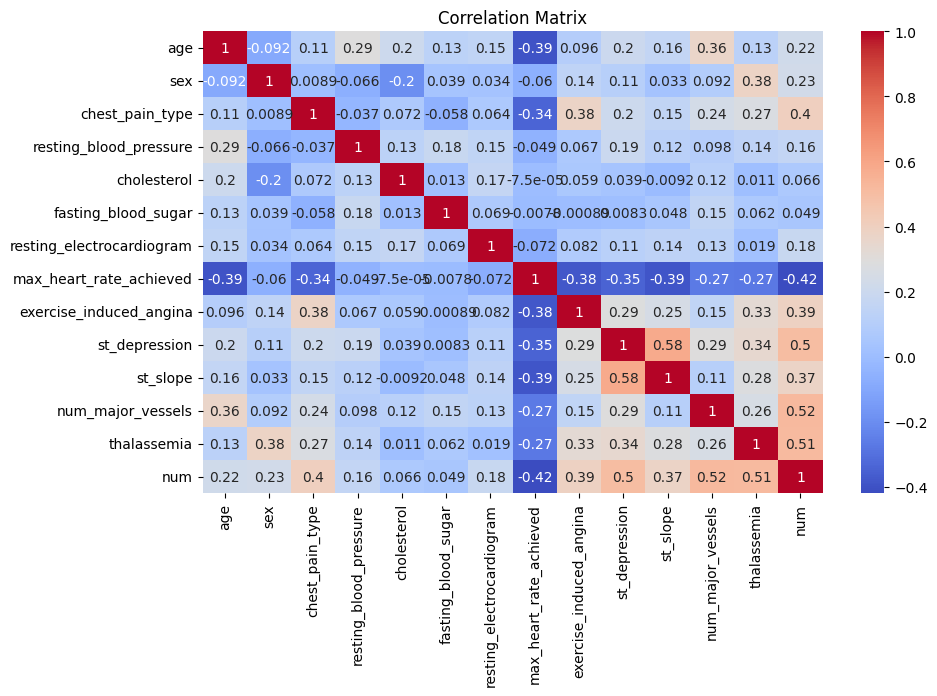

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")

plt.show()

In [21]:
data['num'].value_counts()

num
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64

**Saving the cleaned dataset**

In [28]:
import os
#Save cleanest dataset
save_dir = r"C:\Users\sewasew tadele\Desktop\Heart-Disease-Prediction\data\proccesed"
# Ensure the directory exists
os.makedirs(save_dir, exist_ok=True)

# Save the CSV file
save_path = os.path.join(save_dir, "heart_disease_cleaned.csv")
data.to_csv(save_path, index=False)
print("✅ Data preprocessing complete! Cleaned data saved.")

✅ Data preprocessing complete! Cleaned data saved.
